## KNN

In [1]:
import numpy as np
import csv
import os

In [2]:
data_filename = os.path.join(os.getcwd(),'data', 'Ionosphere',"ionosphere.data")

In [3]:
import csv
import numpy as np

X = np.zeros((351, 34), dtype='float')
y = np.zeros((351,), dtype='bool')

with open(data_filename, 'r') as input_file:
    reader = csv.reader(input_file)
    for i, row in enumerate(reader):
        # Get the data, converting each item to a float
        data = [float(datum) for datum in row[:-1]]
        X[i] = data
        # 1 if the class is 'g' i.e good, 0 otherwise i.e bad
        y[i] = row[-1] == 'g'

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X_train.shape[1]))

There are 263 samples in the training dataset
There are 88 samples in the testing dataset
Each sample has 34 features


In [5]:
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()

In [6]:
estimator.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [7]:
y_predicted = estimator.predict(X_test)
accuracy = np.mean(y_test == y_predicted) * 100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 86.4%


#### This is the accuracy for the default parameters for the estimator

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
scores = cross_val_score(estimator, X, y, scoring='accuracy', cv=5)
average_accuracy = np.mean(scores) * 100
print("The average accuracy is {0:.1f}%".format(average_accuracy))

The average accuracy is 82.6%


#### Comparing accuracy for variours parameter value for number of neighbour in the estimator

In [10]:
avg_scores = []
all_scores = []
parameter_values = list(range(1, 21)) # Include 20
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X, y, scoring='accuracy',cv=5)
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

In [11]:
# %matplotlib inline
from matplotlib import pyplot as plt
plt.plot(parameter_values,avg_scores, '-o')
# plt.axis([0, max(parameter_values), 0, 1.0])

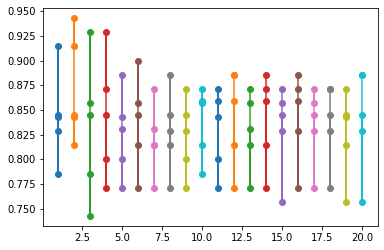

In [12]:
for parameter, scores in zip(parameter_values, all_scores):
    n_scores = len(scores)
    plt.plot([parameter] * n_scores, scores, '-o')

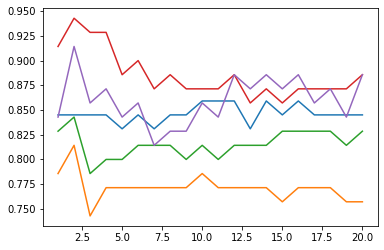

In [13]:
plt.plot(parameter_values, all_scores)

## Effect of changing feature scale of the data on the estimator

In [14]:
X_broken = np.array(X)

In [15]:
X_broken[:,::2] /= 10

### The odd features of the data are now larger than the even features

In [16]:
estimator = KNeighborsClassifier()
original_scores = cross_val_score(estimator, X, y,scoring='accuracy' ,cv=5)
print("The original average accuracy for is {0:.1f}%".format(np.mean(original_scores) * 100))
broken_scores = cross_val_score(estimator, X_broken, y,scoring='accuracy', cv=5)
print("The 'broken' average accuracy for is {0:.1f}%".format(np.mean(broken_scores) * 100))

The original average accuracy for is 82.6%
The 'broken' average accuracy for is 73.8%


In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
X_transformed = MinMaxScaler().fit_transform(X)

In [19]:
X_transformed = MinMaxScaler().fit_transform(X_broken)
estimator = KNeighborsClassifier()
transformed_scores = cross_val_score(estimator, X_transformed, y,scoring='accuracy', cv=5)
print("The average accuracy for is {0:.1f}%".format(np.mean(transformed_scores) * 100))

The average accuracy for is 82.9%


In [20]:
from sklearn.pipeline import Pipeline

In [21]:
scaling_pipeline = Pipeline([('scale', MinMaxScaler()),
                             ('predict', KNeighborsClassifier())])

In [22]:
scores = cross_val_score(scaling_pipeline, X_broken, y, scoring='accuracy', cv=5)
print("The pipeline scored an average accuracy for is {0:.1f}%".format(np.mean(transformed_scores) * 100))

The pipeline scored an average accuracy for is 82.9%
